In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'archivo_EN.csv'
df = pd.read_csv(archivo)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62768 entries, 0 to 62767
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID Empleado                          62768 non-null  int64  
 1   Edad+norm                            62768 non-null  float64
 2   Género+norm                          62768 non-null  float64
 3   Antigüedad en la Empresa+norm        62768 non-null  float64
 4   Rol de Trabajo+norm                  62768 non-null  float64
 5   Ingreso Mensual+norm                 62768 non-null  float64
 6   Balance Trabajo-Vida+norm            62768 non-null  float64
 7   Satisfacción del Trabajo+norm        62768 non-null  float64
 8   Desempeño+norm                       62768 non-null  float64
 9   Número de Promociones+norm           62768 non-null  float64
 10  Horas Extras+norm                    62768 non-null  float64
 11  Distancia a Casa+norm       

## Pregunta a resolver:
### Predicción: ¿Cuál es el ingreso mensual esperado para un empleado nuevo en función de su nivel de educación, rol de trabajo, y tamaño de la empresa?

* Características: Nivel de Educación, Rol de Trabajo y Tamaño de la Empresa
* Variable a predecir: Ingreso Mensual

Este análisis busca identificar cuál Algoritmo de Predicción es el más adecuado para nuestro modelo. Para ello, utilizamos el Análisis de Componentes Principales (PCA), un método no paramétrico de reducción de dimensiones. PCA examina las variaciones en los datos, considerando a los atributos como portadores de información en forma de variaciones numéricas. El objetivo es transformar los datos para evitar dimensiones redundantes y condensar la información. Se seleccionan los componentes principales que explican la mayor parte de la varianza, y los datos se transforman a un nuevo espacio con menor dimensionalidad, conservando la mayor cantidad de información posible.

In [5]:
var_df = pd.DataFrame(df.var())
var_df.columns=['Variance']
var_df.reset_index(inplace=True)
var_df

,index,Variance
0,ID Empleado,2.546681e+09
1,Edad+norm,6.454335e-02
2,Género+norm,2.451856e-01
3,Antigüedad en la Empresa+norm,4.366321e-02
4,Rol de Trabajo+norm,7.991085e-02
5,Ingreso Mensual+norm,3.143262e-02
6,Balance Trabajo-Vida+norm,8.262996e-02
7,Satisfacción del Trabajo+norm,1.035017e-01
8,Desempeño+norm,4.458330e-02
9,Número de Promociones+norm,3.908314e-02


In [6]:
var_df = pd.concat([var_df, pd.DataFrame({'index':['Total'],'Variance':[var_df.Variance.sum()]})],ignore_index=True)
var_df.set_index('index')

,Variance
index,
ID Empleado,2.546681e+09
Edad+norm,6.454335e-02
Género+norm,2.451856e-01
Antigüedad en la Empresa+norm,4.366321e-02
Rol de Trabajo+norm,7.991085e-02
Ingreso Mensual+norm,3.143262e-02
Balance Trabajo-Vida+norm,8.262996e-02
Satisfacción del Trabajo+norm,1.035017e-01
Desempeño+norm,4.458330e-02


In [7]:
df.corr()

,ID Empleado,Edad+norm,Género+norm,Antigüedad en la Empresa+norm,Rol de Trabajo+norm,Ingreso Mensual+norm,Balance Trabajo-Vida+norm,Satisfacción del Trabajo+norm,Desempeño+norm,Número de Promociones+norm,...,Número de Dependientes+estand,Nivel de Trabajo+estand,Tamaño de Empresa+estand,Meses desde el último evento+estand,Trabajo Remoto+estand,Oportunidades de Liderazgo+estand,Oportunidades de Innovación+estand,Reputación de la Empresa+estand,Reconocimiento a Empleado+estand,Deserción+estand
ID Empleado,1.000000,-0.191911,-0.044749,-0.301167,0.809343,-0.105063,0.085325,-0.041867,0.149270,0.099709,...,-0.232375,-0.124289,0.665933,-0.320628,-0.268064,-0.126476,-0.239435,0.363519,0.025758,-0.300434
Edad+norm,-0.191911,1.000000,0.023284,0.503442,-0.184529,0.133126,-0.014135,-0.002873,-0.032783,-0.014667,...,0.053376,0.042536,-0.144367,0.222980,0.054348,0.027673,0.052160,-0.074342,-0.010477,-0.003809
Género+norm,-0.044749,0.023284,1.000000,0.019873,-0.045148,0.021896,-0.005906,-0.014125,-0.007981,-0.002913,...,0.008277,-0.001076,-0.036715,0.026601,0.012390,0.005568,0.012367,-0.020217,0.000266,0.080691
Antigüedad en la Empresa+norm,-0.301167,0.503442,0.019873,1.000000,-0.304840,0.210533,-0.021117,0.013435,-0.051942,-0.031976,...,0.082460,0.074495,-0.227382,0.494058,0.090251,0.042961,0.082838,-0.123549,-0.014227,0.044168
Rol de Trabajo+norm,0.809343,-0.184529,-0.045148,-0.304840,1.000000,-0.136515,0.073089,-0.041340,0.139128,0.091791,...,-0.212384,-0.118774,0.613771,-0.328633,-0.245453,-0.114502,-0.224282,0.335743,0.026424,-0.279445
Ingreso Mensual+norm,-0.105063,0.133126,0.021896,0.210533,-0.136515,1.000000,0.005366,-0.003518,-0.016392,-0.008153,...,0.027725,0.183655,-0.078672,0.237126,0.028053,0.013642,0.026719,-0.044197,-0.003880,-0.001170
Balance Trabajo-Vida+norm,0.085325,-0.014135,-0.005906,-0.021117,0.073089,0.005366,1.000000,-0.013125,0.019738,-0.003205,...,-0.023862,-0.015917,0.065322,-0.025066,-0.024181,-0.013091,-0.023523,0.033212,-0.001074,-0.165154
Satisfacción del Trabajo+norm,-0.041867,-0.002873,-0.014125,0.013435,-0.041340,-0.003518,-0.013125,1.000000,-0.004253,-0.001792,...,0.013278,0.009673,-0.026885,0.004219,0.009431,0.007391,0.018438,-0.019652,0.003408,0.005771
Desempeño+norm,0.149270,-0.032783,-0.007981,-0.051942,0.139128,-0.016392,0.019738,-0.004253,1.000000,0.024695,...,-0.037396,-0.011630,0.112764,-0.051461,-0.038021,-0.018959,-0.035846,0.062054,0.007840,-0.089819
Número de Promociones+norm,0.099709,-0.014667,-0.002913,-0.031976,0.091791,-0.008153,-0.003205,-0.001792,0.024695,1.000000,...,-0.025463,-0.016209,0.073892,-0.034062,-0.025245,-0.013746,-0.027105,0.036468,0.002364,-0.102386


In [8]:
from sklearn.decomposition import PCA

# Crear una instancia de PCA sin especificar el número de componentes (usará el máximo posible)
pca = PCA(n_components=2)

# Ajustar PCA a los datos (toy_df es tu DataFrame con los datos originales)
pca.fit(df)

# Transformar los datos con PCA y crear un nuevo DataFrame
PCA_df = pd.DataFrame(pca.transform(df))

# Renombrar las columnas para indicar los componentes principales
PCA_df.columns = ['PC1', 'PC2']

# Mostrar el DataFrame transformado
PCA_df


,PC1,PC2
0,-8894.526599,0.294365
1,-7859.526579,-0.702438
2,-49282.526593,-0.977330
3,-8680.526626,1.276188
4,-36651.526558,1.957293
...,...,...
62763,69141.473508,1.019809
62764,69142.473504,1.018279
62765,69144.473504,1.018301
62766,69148.473486,2.065601


In [10]:
var_df = pd.DataFrame(PCA_df.var())
var_df.columns=['Variance']
var_df.reset_index(inplace=True)
var_df

,index,Variance
0,PC1,2.546681e+09
1,PC2,1.859374e+00


In [11]:
var_df = pd.concat([var_df, pd.DataFrame({'index':['Total'],'Variance':[var_df.Variance.sum()]})],ignore_index=True)
var_df.set_index('index')

,Variance
index,
PC1,2.546681e+09
PC2,1.859374e+00
Total,2.546681e+09


In [12]:
PCA_df.corr()

,PC1,PC2
PC1,1.000000e+00,-5.279701e-16
PC2,-5.279701e-16,1.000000e+00


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y= df['Ingreso Mensual+norm']
X_trainPCA, X_testPCA, Y_trainPCA, Y_testPCA = train_test_split(PCA_df, y, test_size=0.2, random_state=2)

In [11]:
print(PCA_df.shape, X_trainPCA.shape, X_testPCA.shape)

(62768, 2) (50214, 2) (12554, 2)


# Regresión Lineal con PCA

In [12]:
regressorPCA = LinearRegression()
regressorPCA.fit(X_trainPCA, Y_trainPCA)

LinearRegression()

In [13]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = regressorPCA.predict(X_trainPCA)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainPCA, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainPCA, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainPCA, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.2586816412556805
Valor RMSE:  0.15356470495304278
Valor MAE:  0.11945114112481715


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
test_data_prediction = regressorPCA.predict(X_testPCA)

In [15]:
r2_test = metrics.r2_score(Y_testPCA, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testPCA, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testPCA, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.24979250054613333
Valor RMSE:  0.14980131691137583
Valor MAE:  0.11756778491303242


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El MAE y RMSE es muy alto con valores Estandarizados pero es aceptable con valores Normalizados, el R2 sigue siendo bajo en ambos casos. Esto nos brinda la información de que tipo de transformación de datos utilizaremos.

# Regresión de Árbol Aleatorio con PCA

In [16]:
from sklearn.ensemble import RandomForestRegressor

modelPCA = RandomForestRegressor()
modelPCA.fit(X_trainPCA, Y_trainPCA)

RandomForestRegressor()

In [17]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = modelPCA.predict(X_trainPCA)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainPCA, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainPCA, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainPCA, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.9573516112481975
Valor RMSE:  0.036833275891588975
Valor MAE:  0.024250377358051394


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
test_data_prediction2 = modelPCA.predict(X_testPCA)

In [19]:
r2_test = metrics.r2_score(Y_testPCA, test_data_prediction2)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testPCA, test_data_prediction2, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testPCA, test_data_prediction2)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.6786628140326733
Valor RMSE:  0.09804047883941407
Valor MAE:  0.06536024032839541


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cuando las métricas de rendimiento del entrenamiento son muy diferentes a las de las pruebas, generalmente se interpreta como un síntoma de Sobreajuste (Overfitting) o Subajuste (Underfitting). En general, las métricas de entrenamiento son muy buenas, considerando este algoritmo un gran candidato pero no se reflejan estos resultados en las pruebas.

# K Vecinos más Cercanos (KNN) con PCA

In [20]:
from sklearn.neighbors import KNeighborsRegressor

model2PCA = KNeighborsRegressor()
model2PCA.fit(X_trainPCA, Y_trainPCA)

KNeighborsRegressor()

In [21]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = model2PCA.predict(X_trainPCA)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainPCA, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainPCA, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainPCA, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.7488263205976271
Valor RMSE:  0.08938735687450663
Valor MAE:  0.06037211687112387


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
test_data_prediction3 = model2PCA.predict(X_testPCA)

In [23]:
r2_test = metrics.r2_score(Y_testPCA, test_data_prediction3)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testPCA, test_data_prediction3, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testPCA, test_data_prediction3)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.5920567006039759
Valor RMSE:  0.11046503454343434
Valor MAE:  0.07689147327987539


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Ahora se probará entrenando al Algoritmos con todas las variables

In [3]:
X2 = df[['Edad+norm', 'Género+norm', 'Antigüedad en la Empresa+norm', 'Rol de Trabajo+norm', 'Balance Trabajo-Vida+norm', 'Satisfacción del Trabajo+norm', 'Desempeño+norm', 'Número de Promociones+norm', 'Horas Extras+norm', 'Distancia a Casa+norm', 'Nivel de Educación+norm', 'Estado Civil+norm', 'Número de Dependientes+norm', 'Nivel de Trabajo+norm', 'Tamaño de Empresa+norm', 'Meses desde el último evento+norm', 'Trabajo Remoto+norm', 'Oportunidades de Liderazgo+norm', 'Oportunidades de Innovación+norm', 'Reputación de la Empresa+norm', 'Reconocimiento a Empleado+norm', 'Deserción+norm']]
Y2 = df['Ingreso Mensual+norm']

Las variables características serán todas las que estan normalizadas ya que así no se repiten los datos y en función a las demás comparativas, siempre fue la que mejores resultados nos dá. No se contemplará la variable de ID Empleado ya que solo sirve para identificar los registros y no brinda información relevante para la predicción. Por obvias razones tampoco se usa la variable de Ingresos Mensuales ya que es la que deseamos predecir.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_trainAll, X_testAll, Y_trainAll, Y_testAll = train_test_split(X2, Y2, test_size=0.2, random_state=2)

In [5]:
print(X2.shape, X_trainAll.shape, X_testAll.shape)

(62768, 22) (50214, 22) (12554, 22)


# Regresión Lineal con todas las variables

In [27]:
regressorAll = LinearRegression()
regressorAll.fit(X_trainAll, Y_trainAll)

LinearRegression()

In [28]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = regressorAll.predict(X_trainAll)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainAll, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainAll, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainAll, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.1003991533322639
Valor RMSE:  0.1691663424996807
Valor MAE:  0.131200028761592


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
test_data_prediction = regressorAll.predict(X_testAll)

In [30]:
r2_test = metrics.r2_score(Y_testAll, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testAll, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testAll, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.09200581959663467
Valor RMSE:  0.16480351229862097
Valor MAE:  0.12915518651873176


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
# Usamos todas las variables
# Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [59,1,4,0,0,2,0,3,0,21,3,0,3,0,0,21,0,0,0,0,0,0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = regressorAll.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [59.  1.  4.  0.  0.  2.  0.  3.  0. 21.  3.  0.  3.  0.  0. 21.  0.  0.
  0.  0.  0.  0.]
Valores normalizados: [1.         0.01694915 0.06779661 0.         0.         0.03389831
 0.         0.05084746 0.         0.3559322  0.05084746 0.
 0.05084746 0.         0.         0.3559322  0.         0.
 0.         0.         0.         0.        ]
El ingreso mensual del empleado será:  [6998.13331615]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Regresión de Árbol Aleatorio con todas las variables

In [6]:
from sklearn.ensemble import RandomForestRegressor
modelAll = RandomForestRegressor()
modelAll.fit(X_trainAll, Y_trainAll)

RandomForestRegressor()

In [ ]:
import pickle
with open('modelprediccion.pkl', 'wb') as file:
    pickle.dump(modelAll, file)

Observamos los hiperparámetros predeterminados de este algoritmo. 

In [38]:
print(modelAll.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [33]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = modelAll.predict(X_trainAll)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainAll, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainAll, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainAll, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.9868922207630522
Valor RMSE:  0.020419899065173504
Valor MAE:  0.011819032581625002


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
test_data_prediction = modelAll.predict(X_testAll)

In [35]:
r2_test = metrics.r2_score(Y_testAll, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testAll, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testAll, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.9011227723854403
Valor RMSE:  0.0543842409128592
Valor MAE:  0.031580197622101985


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
# Usamos todas las variables
# Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [59,1,4,0,0,2,0,3,0,21,3,0,3,0,0,21,0,0,0,0,0,0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = modelAll.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [59.  1.  4.  0.  0.  2.  0.  3.  0. 21.  3.  0.  3.  0.  0. 21.  0.  0.
  0.  0.  0.  0.]
Valores normalizados: [1.         0.01694915 0.06779661 0.         0.         0.03389831
 0.         0.05084746 0.         0.3559322  0.05084746 0.
 0.05084746 0.         0.         0.3559322  0.         0.
 0.         0.         0.         0.        ]
El ingreso mensual del empleado será:  [5956.72]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Como este algoritmo es el que mejores resultados nos entregó, probaremos con cambiar algunos hiperparámetros para poder tener mejores métricas y resultados más precisos.

Empezamos haciendo un análisis de los hiperparámetros para poder así saber cual es la configuración más optima de los mismos.

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Inicializar el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros a probar
param_dist = {
    'n_estimators': randint(50, 300),        # Número de árboles en el bosque
    'max_depth': randint(5, 50),             # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),     # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': randint(1, 20),      # Mínimo número de muestras necesarias en una hoja
    'max_features': ['auto', 'sqrt', 'log2'] # Número de características a considerar en cada división
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=50,                    # Número de combinaciones de hiperparámetros a probar
    cv=5,                          # Número de pliegues para validación cruzada
    scoring='neg_mean_absolute_error',  # Métrica de evaluación
    random_state=42,
    n_jobs=-1                      # Usa todos los núcleos disponibles
)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search.fit(X_trainAll, Y_trainAll)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores hiperparámetros encontrados:", best_params)
print("Mejor puntuación (MAE negativo):", best_score)

# Evaluar el mejor modelo en los datos de prueba
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_testAll, Y_testAll)

print("Puntuación en los datos de prueba:", test_score)

c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\EDA Des

Mejores hiperparámetros encontrados: {'max_depth': 48, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 276}
Mejor puntuación (MAE negativo): -0.03977006915462551
Puntuación en los datos de prueba: 0.8904308160711738


Una vez obtenidos, procedemos a realizar el cambio de estos. Lo hacemos mediante otra variables para poder comparar los resultados al final.

In [39]:
# Configurar el modelo con hiperparámetros específicos
rf_model = RandomForestRegressor(
    n_estimators=276,     # Número de árboles en el bosque
    max_depth=48,         # Profundidad máxima de cada árbol
    min_samples_split=2,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=3,   # Mínimo de muestras en una hoja
    max_features='sqrt',  # Número de características a considerar para el split
    random_state=42       # Fijar semilla para reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_trainAll, Y_trainAll)

RandomForestRegressor(max_depth=48, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=276, random_state=42)

In [40]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = rf_model.predict(X_trainAll)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainAll, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainAll, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainAll, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.9500567282789651
Valor RMSE:  0.03985910349697362
Valor MAE:  0.02603934195808523


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
test_data_predictionrf = rf_model.predict(X_testAll)

In [43]:
r2_test = metrics.r2_score(Y_testAll, test_data_predictionrf)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testAll, test_data_predictionrf, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testAll, test_data_predictionrf)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.8904308160711738
Valor RMSE:  0.05724916334670611
Valor MAE:  0.03746031663443615


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
# Usamos todas las variables
# Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [59,1,4,0,0,2,0,3,0,21,3,0,3,0,0,21,0,0,0,0,0,0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = rf_model.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [59.  1.  4.  0.  0.  2.  0.  3.  0. 21.  3.  0.  3.  0.  0. 21.  0.  0.
  0.  0.  0.  0.]
Valores normalizados: [1.         0.01694915 0.06779661 0.         0.         0.03389831
 0.         0.05084746 0.         0.3559322  0.05084746 0.
 0.05084746 0.         0.         0.3559322  0.         0.
 0.         0.         0.         0.        ]
El ingreso mensual del empleado será:  [5998.13454102]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


En conclusión podemos observar que no mejor la predicción. Podemos seguir realizando analisis con diferentes rangos en los hiperparámetros y asi obtener diferentes resultados hasta dar con alguno que nos satisfaga. Como las métricas y predicción son muy buenas con la configuración predeterminada, decidimos quedarnos con ese algoritmo.

# K Vecinos más Cercanos (KNN) con todas las variables

In [137]:
from sklearn.neighbors import KNeighborsRegressor
model2All = KNeighborsRegressor()
model2All.fit(X_trainAll, Y_trainAll)

KNeighborsRegressor()

In [138]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = model2All.predict(X_trainAll)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainAll, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainAll, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainAll, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.7831649738481985
Valor RMSE:  0.08305269895580031
Valor MAE:  0.05388098391228879


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [140]:
test_data_prediction = model2All.predict(X_testAll)

In [141]:
r2_test = metrics.r2_score(Y_testAll, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testAll, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testAll, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.6503002937992792
Valor RMSE:  0.10227572443878108
Valor MAE:  0.0678771827873151


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [142]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
# Usamos todas las variables
# Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [59,1,4,0,0,2,0,3,0,21,3,0,3,0,0,21,0,0,0,0,0,0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = model2All.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [59.  1.  4.  0.  0.  2.  0.  3.  0. 21.  3.  0.  3.  0.  0. 21.  0.  0.
  0.  0.  0.  0.]
Valores normalizados: [1.         0.01694915 0.06779661 0.         0.         0.03389831
 0.         0.05084746 0.         0.3559322  0.05084746 0.
 0.05084746 0.         0.         0.3559322  0.         0.
 0.         0.         0.         0.        ]
El ingreso mensual del empleado será:  [7472.4]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# En esta instancia realizaremos la comparativa con valores normalizados y utilizando las tres variables clasificatorias que impusimos la pincipio

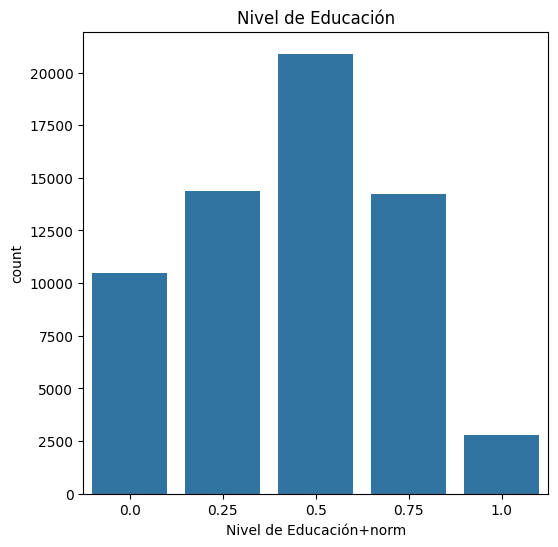

Nivel de Educación+norm
0.50    20894
0.25    14360
0.75    14223
0.00    10479
1.00     2812
Name: count, dtype: int64

In [61]:
plt.figure(figsize=(6,6))
sns.countplot(x='Nivel de Educación+norm', data=df)
plt.title('Nivel de Educación')
plt.show()
df['Nivel de Educación+norm'].value_counts()

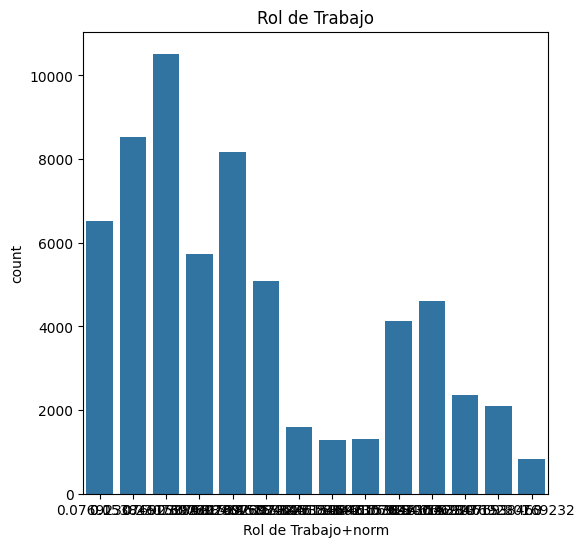

Rol de Trabajo+norm
0.153846    10519
0.076923     8532
0.307692     8167
0.000000     6513
0.230769     5722
0.384615     5086
0.769231     4615
0.692308     4131
0.846154     2371
0.923077     2092
0.461538     1592
0.615385     1301
0.538462     1285
1.000000      842
Name: count, dtype: int64

In [62]:
plt.figure(figsize=(6,6))
sns.countplot(x='Rol de Trabajo+norm', data=df)
plt.title('Rol de Trabajo')
plt.show()
df['Rol de Trabajo+norm'].value_counts()

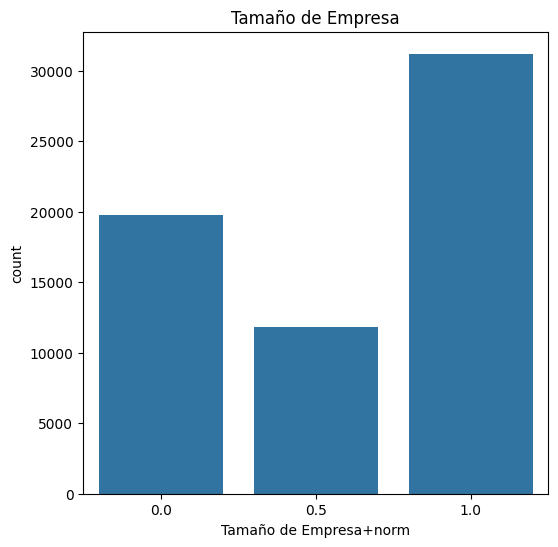

Tamaño de Empresa+norm
1.0    31194
0.0    19725
0.5    11849
Name: count, dtype: int64

In [63]:
plt.figure(figsize=(6,6))
sns.countplot(x='Tamaño de Empresa+norm', data=df)
plt.title('Tamaño de Empresa')
plt.show()
df['Tamaño de Empresa+norm'].value_counts()

# Regresión Lineal 

In [64]:
X = df[['Nivel de Educación+norm', 'Rol de Trabajo+norm', 'Tamaño de Empresa+norm']]
Y = df['Ingreso Mensual+norm']

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(62768, 3) (50214, 3) (12554, 3)


In [67]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [68]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = regressor.predict(X_train)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_train, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_train, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.018619331956328034
Valor RMSE:  0.17668829553192175
Valor MAE:  0.1344631451231871


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Con datos estandarizados el MAE es muy alto por lo que tendremos un error seguro en las predicciones a realizar, en cambio con los datos normalizados, el MAE es muy bajo permitiendonos tener una predicción acertada. Esta se puede mejorar mediante los hiperparámetros.

In [69]:
test_data_prediction = regressor.predict(X_test)

In [70]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_test, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.02022770332976853
Valor RMSE:  0.17119359356435535
Valor MAE:  0.1321936069897281


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
#   Nivel de Educación: Masters Degree (3)
#   Rol de Trabajo: Media (4)
#   Tamaño de Empresa: Medium (0)
#   Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [3, 4, 0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = regressor.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [3. 4. 0.]
Valores normalizados: [0.75 1.   0.  ]
El ingreso mensual del empleado será:  [5886.89137421]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Regresión de Árbol Aleatorio


In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=2)

In [92]:
print(X.shape, X_train2.shape, X_test2.shape)

(62768, 3) (50214, 3) (12554, 3)


In [93]:
model = RandomForestRegressor()

In [94]:
model.fit(X_train2, Y_train2)

RandomForestRegressor()

In [95]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = model.predict(X_train)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_train, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_train, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.7729956820308498
Valor RMSE:  0.08497791888859518
Valor MAE:  0.061191905476755966


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [96]:
test_data_prediction = model.predict(X_test)

In [97]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_test, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.7563013786699074
Valor RMSE:  0.08537907921837114
Valor MAE:  0.05987559557968488


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
#   Nivel de Educación: Masters Degree (3)
#   Rol de Trabajo: Media (4)
#   Tamaño de Empresa: Medium (0)
#   Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [3, 4, 0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = model.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [3. 4. 0.]
Valores normalizados: [0.75 1.   0.  ]
El ingreso mensual del empleado será:  [4461.82207163]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# K Vecinos más Cercanos (KNN)

In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.2, random_state=2)

In [101]:
model2 = KNeighborsRegressor()

In [102]:
print(X.shape, X_train3.shape, X_test3.shape)

(62768, 3) (50214, 3) (12554, 3)


In [103]:
model2.fit(X_train3, Y_train3)

KNeighborsRegressor()

In [104]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = model2.predict(X_train)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_train, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_train, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.7272634894846702
Valor RMSE:  0.09314524121863599
Valor MAE:  0.0665071142692006


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [105]:
test_data_prediction = model2.predict(X_test)

In [106]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_test, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.7018019153161037
Valor RMSE:  0.09444464869190186
Valor MAE:  0.06590847349875081


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
#   Nivel de Educación: Masters Degree (3)
#   Rol de Trabajo: Media (4)
#   Tamaño de Empresa: Medium (0)
#   Posible valor = 5534

import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 1009
max_val = 19999

input_data = [3, 4, 0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = model2.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El ingreso mensual del empleado será: ', x_original)

Valores originales: [3. 4. 0.]
Valores normalizados: [0.75 1.   0.  ]
El ingreso mensual del empleado será:  [7860.]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Clasificación: ¿Qué puntuación de satisfacción laboral se puede asignar a un empleado?

Esta pregunta será respondida mediante Algoritmos de Clasificación. Nosotros utilizamos Clasificación por Bosques Aleatorio, Clasificación por K vecinos cercanos y Regresión Logística, esta última es util para clasificación binaria o multiclase cuando las clases son linealmente separables. Cabe aclarar que se probó la implementación de Máquina de vectores de soporte (SVM) pero no obtuvimos buenos resultados además de que su procesamiento y analisis duraba aproximadamente entre 30 minutos a 1 hora, haciendo que sea imposible probar diferentes valores y modificaciones.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif para clasificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.linear_model import LogisticRegression  # Regresión Logística
from sklearn.preprocessing import LabelEncoder  # Para la codificación de etiquetas

# Cargar el conjunto de datos
file_path = 'archivo_int64.csv'  
df2 = pd.read_csv(file_path)

# Eliminar las columnas '+norm', '+estand' e 'ID Empleado' para obtener solo las variables relevantes
columns_to_drop = ['ID Empleado']
df_cleaned = df2.drop(columns=columns_to_drop)

# Asegurarse de que la columna 'Satisfacción del Trabajo' exista
target_column = 'Satisfacción del Trabajo'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo 'Satisfacción del Trabajo'
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas excepto 'Satisfacción del Trabajo'
y = df_cleaned[target_column]  # 'Satisfacción del Trabajo' como la variable objetivo

# Convertir las etiquetas de 'Satisfacción del Trabajo' en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Variable para controlar el número de características a seleccionar
k_best_features = 8  # Modifica este valor según la cantidad de características que quieras usar

# Función para seleccionar las mejores características con SelectKBest
def select_best_features(X_train, X_test, y_train, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)  # Usamos f_classif para clasificación
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Obtener las mejores características y sus puntuaciones
    best_feature_indices = selector.get_support(indices=True)
    best_features = X_train.columns[best_feature_indices]
    feature_scores = selector.scores_[best_feature_indices]
    
    # Crear un DataFrame con las mejores características y sus puntuaciones
    best_features_df = pd.DataFrame({
        'Feature': best_features,
        'Score': feature_scores
    }).sort_values(by='Score', ascending=False)
    
    return X_train_selected, X_test_selected, best_features_df

# Seleccionar las mejores características
X_train_selected, X_test_selected, best_features_df = select_best_features(X_train, X_test, y_train, k=k_best_features)

# Mostrar las mejores características seleccionadas
print("Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:")
print(best_features_df)

# Función para evaluar los modelos
def evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected):
    results = {}
    
    # Inicializar los modelos (KNN, Random Forest y Regresión Logística)
    knn_model = KNeighborsClassifier(n_neighbors=5)  # Modelo KNN
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest
    lr_model = LogisticRegression(random_state=42, max_iter=1000)  # Aumentar max_iter para evitar advertencias
    
    # Evaluar el modelo KNN con todas las características
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    results['KNN_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_knn),
        'classification_report_all': classification_report(y_test, y_pred_knn),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_knn)
    }

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }

    # Evaluar el modelo Regresión Logística con todas las características
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    results['LR_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_lr),
        'classification_report_all': classification_report(y_test, y_pred_lr),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_lr)
    }

    # Evaluación con selección de características para KNN
    knn_model.fit(X_train_selected, y_train)
    y_pred_knn_selected = knn_model.predict(X_test_selected)
    results['KNN_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_knn_selected),
        'classification_report_selected': classification_report(y_test, y_pred_knn_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_knn_selected)
    }

    # Evaluación con selección de características para Random Forest
    rf_model.fit(X_train_selected, y_train)
    y_pred_rf_selected = rf_model.predict(X_test_selected)
    results['RF_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_rf_selected),
        'classification_report_selected': classification_report(y_test, y_pred_rf_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_rf_selected)
    }

    # Evaluación con selección de características para Regresión Logística
    lr_model.fit(X_train_selected, y_train)
    y_pred_lr_selected = lr_model.predict(X_test_selected)
    results['LR_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_lr_selected),
        'classification_report_selected': classification_report(y_test, y_pred_lr_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_lr_selected)
    }
    
    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")
    
    print("\nResultados con selección de las mejores variables:")
    if 'accuracy_selected' in metrics:
        print(f"Accuracy: {metrics['accuracy_selected']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_selected']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_selected']}")

Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:
                        Feature       Score
1                Rol de Trabajo  536.723052
3             Tamaño de Empresa  406.954854
2              Distancia a Casa  311.023650
7      Reputación de la Empresa  118.366184
4  Meses desde el último evento   86.156069
0      Antigüedad en la Empresa   76.708110
5                Trabajo Remoto   58.207989
6   Oportunidades de Innovación   49.239033


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being


Resultados para clasificación:

Modelo: KNN_all

Resultados con todas las variables:
Accuracy: 0.6090
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      1693
           1       0.50      0.47      0.49      2537
           2       0.60      0.73      0.65      5222
           3       0.72      0.54      0.61      3102

    accuracy                           0.61     12554
   macro avg       0.62      0.58      0.59     12554
weighted avg       0.62      0.61      0.61     12554

Matriz de confusión:
[[1003  136  483   71]
 [ 130 1197 1036  174]
 [ 282  762 3786  392]
 [ 117  288 1037 1660]]

Resultados con selección de las mejores variables:

Modelo: RF_all

Resultados con todas las variables:
Accuracy: 0.6788
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1693
           1       0.97      0.36      0.52      2537
           

c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Análisis de los resultados y conclusión final

Antes de las pruebas, se realiza una cálculo para identificar las mejores características para la clasificación utilizando la librería SelectBest. Mediante la selección f_classif, se utiliza el estadístico F de análisis de varianza (ANOVA). Este criterio calcula la relación estadística entre cada característica y la variable objetivo. Una vez obtenidas las mejores variables se lleva a cabo un entrenamiento y prueba con estas variables teniendo un pequeño sesgo y luego también con todas las variables del Dataset.

# K vecinos cercanos con todas las variables

Las metricas obtenidas por este algoritmo nos indica una precisión del 61% (accuracy = 0.61), lo cual no es relativamente malo ni bueno. Luego se analiza un promedio macro (macro avg) donde no se considera el peso de las clases, dando como resultado precision = 0.62, recall = 0.58 y f1-score = 0.59. También se tiene en cuenta el promedio ponderado (weighted avg) considerando el número de instancias en cada clase (el support), sus resultados son precision = 0.62, recall = 0.61 y f1-score = 0.61. En esta explicación obviamos los porcentajes por instancias ya que se analizaran más detenidamente en la comparación con los otros algoritmos.
Para finalizar se nos brinda una Matriz de confusión que te muestra cómo el modelo clasifica las instancias de cada clase y dónde comete errores. Cada fila representa las instancias reales de una clase específica, mientras que cada columna representa las predicciones realizadas por el modelo para esas clases. Esto nos es útil para poder desempatar en caso de que dos modelos presenten métricas similares.

# K vecinos cercanos con las mejores características

Resultados finales:
* accuracy = 0.52
* macro avg: precision = 0.51, recall = 0.47 y f1-score = 0.48
* weighted avg: precision = 0.52, recall = 0.52 y f1-score = 0.51

# Bosques Aleatorios con todas las variables

Resultados finales:
* accuracy = 0.68
* macro avg: precision = 0.87, recall = 0.60 y f1-score = 0.65
* weighted avg: precision = 0.80, recall = 0.68 y f1-score = 0.66

# Bosques Aleatorios con las mejores características

Resultados finales:
* accuracy = 0.56
* macro avg: precision = 0.59, recall = 0.49 y f1-score = 0.51
* weighted avg: precision = 0.57, recall = 0.56 y f1-score = 0.54

# Regresión Logística con todas las variables

Resultados finales:
* accuracy = 0.42
* macro avg: precision = 0.19, recall = 0.27 y f1-score = 0.20
* weighted avg: precision = 0.26, recall = 0.42 y f1-score = 0.30

# Regresión Logística con las mejores características

Resultados finales:
* accuracy = 0.42
* macro avg: precision = 0.19, recall = 0.26 y f1-score = 0.19
* weighted avg: precision = 0.26, recall = 0.42 y f1-score = 0.29

Como conclusión podemos presenciar que cuando se realizan las pruebas con las variables seleccionadas que mantienen un sesgo, los resultados son significativamente peores que cuando se realiza con todas las variables. En el caso de la regresión logística, en las dos pruebas nos da un resultado identica y a su vez muy malo, por lo que es el primero en se descartado. Luego entre KNN y Bosques Aleatorios el mejor con diferencia es Bosques Aleatorios con todas las variables, si bien sus métricas son aceptables se podrían mejorar ajustando los hiperparámetros.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif para clasificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.preprocessing import LabelEncoder  # Para la codificación de etiquetas

# Cargar el conjunto de datos
file_path = 'archivo_EN.csv'  
df2 = pd.read_csv(file_path)

# Eliminar las columnas '+norm', '+estand' e 'ID Empleado' para obtener solo las variables relevantes
estand_columns = [col for col in df2.columns if col.endswith('+estand')]
columns_to_drop = estand_columns + ['ID Empleado']
df_cleaned = df2.drop(columns=columns_to_drop)

# Asegurarse de que la columna 'Satisfacción del Trabajo' exista
target_column = 'Satisfacción del Trabajo+norm'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo 'Satisfacción del Trabajo'
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas excepto 'Satisfacción del Trabajo'
y = df_cleaned[target_column]  # 'Satisfacción del Trabajo' como la variable objetivo

# Convertir las etiquetas de 'Satisfacción del Trabajo' en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Variable para controlar el número de características a seleccionar
k_best_features = 8  # Modifica este valor según la cantidad de características que quieras usar

# Función para seleccionar las mejores características con SelectKBest
def select_best_features(X_train, X_test, y_train, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)  # Usamos f_classif para clasificación
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Obtener las mejores características y sus puntuaciones
    best_feature_indices = selector.get_support(indices=True)
    best_features = X_train.columns[best_feature_indices]
    feature_scores = selector.scores_[best_feature_indices]
    
    # Crear un DataFrame con las mejores características y sus puntuaciones
    best_features_df = pd.DataFrame({
        'Feature': best_features,
        'Score': feature_scores
    }).sort_values(by='Score', ascending=False)
    
    return X_train_selected, X_test_selected, best_features_df

# Seleccionar las mejores características
X_train_selected, X_test_selected, best_features_df = select_best_features(X_train, X_test, y_train, k=k_best_features)

# Mostrar las mejores características seleccionadas
print("Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:")
print(best_features_df)

# Función para evaluar los modelos
def evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected):
    results = {}
    
    # Inicializar los modelos (KNN, Random Forest y Regresión Logística)
    knn_model = KNeighborsClassifier(n_neighbors=5)  # Modelo KNN
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest
    
    # Evaluar el modelo KNN con todas las características
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    results['KNN_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_knn),
        'classification_report_all': classification_report(y_test, y_pred_knn),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_knn)
    }

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }
  

    # Evaluación con selección de características para KNN
    knn_model.fit(X_train_selected, y_train)
    y_pred_knn_selected = knn_model.predict(X_test_selected)
    results['KNN_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_knn_selected),
        'classification_report_selected': classification_report(y_test, y_pred_knn_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_knn_selected)
    }

    # Evaluación con selección de características para Random Forest
    rf_model.fit(X_train_selected, y_train)
    y_pred_rf_selected = rf_model.predict(X_test_selected)
    results['RF_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_rf_selected),
        'classification_report_selected': classification_report(y_test, y_pred_rf_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_rf_selected)
    }
    
    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")
    
    print("\nResultados con selección de las mejores variables:")
    if 'accuracy_selected' in metrics:
        print(f"Accuracy: {metrics['accuracy_selected']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_selected']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_selected']}")

Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:
                             Feature       Score
1                Rol de Trabajo+norm  536.723052
3             Tamaño de Empresa+norm  406.954854
2              Distancia a Casa+norm  311.023650
7      Reputación de la Empresa+norm  118.366184
4  Meses desde el último evento+norm   86.156069
0      Antigüedad en la Empresa+norm   76.708110
5                Trabajo Remoto+norm   58.207989
6   Oportunidades de Innovación+norm   49.239033

Resultados para clasificación:

Modelo: KNN_all

Resultados con todas las variables:
Accuracy: 0.5910
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1693
           1       0.48      0.45      0.47      2537
           2       0.59      0.72      0.65      5222
           3       0.70      0.51      0.59      3102

    accuracy                           0.59     12554
   macro avg       0.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif para clasificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.preprocessing import LabelEncoder  # Para la codificación de etiquetas

# Cargar el conjunto de datos
file_path = 'archivo_EN.csv'  
df2 = pd.read_csv(file_path)

# Eliminar las columnas '+norm', '+estand' e 'ID Empleado' para obtener solo las variables relevantes
norm_columns = [col for col in df2.columns if col.endswith('+norm')]
columns_to_drop = norm_columns + ['ID Empleado']
df_cleaned = df2.drop(columns=columns_to_drop)

# Asegurarse de que la columna 'Satisfacción del Trabajo' exista
target_column = 'Satisfacción del Trabajo+estand'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo 'Satisfacción del Trabajo'
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas excepto 'Satisfacción del Trabajo'
y = df_cleaned[target_column]  # 'Satisfacción del Trabajo' como la variable objetivo

# Convertir las etiquetas de 'Satisfacción del Trabajo' en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Variable para controlar el número de características a seleccionar
k_best_features = 8  # Modifica este valor según la cantidad de características que quieras usar

# Función para seleccionar las mejores características con SelectKBest
def select_best_features(X_train, X_test, y_train, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)  # Usamos f_classif para clasificación
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Obtener las mejores características y sus puntuaciones
    best_feature_indices = selector.get_support(indices=True)
    best_features = X_train.columns[best_feature_indices]
    feature_scores = selector.scores_[best_feature_indices]
    
    # Crear un DataFrame con las mejores características y sus puntuaciones
    best_features_df = pd.DataFrame({
        'Feature': best_features,
        'Score': feature_scores
    }).sort_values(by='Score', ascending=False)
    
    return X_train_selected, X_test_selected, best_features_df

# Seleccionar las mejores características
X_train_selected, X_test_selected, best_features_df = select_best_features(X_train, X_test, y_train, k=k_best_features)

# Mostrar las mejores características seleccionadas
print("Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:")
print(best_features_df)

# Función para evaluar los modelos
def evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected):
    results = {}
    
    # Inicializar los modelos (KNN, Random Forest y Regresión Logística)
    knn_model = KNeighborsClassifier(n_neighbors=5)  # Modelo KNN
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest
    
    # Evaluar el modelo KNN con todas las características
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    results['KNN_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_knn),
        'classification_report_all': classification_report(y_test, y_pred_knn),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_knn)
    }

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }
  

    # Evaluación con selección de características para KNN
    knn_model.fit(X_train_selected, y_train)
    y_pred_knn_selected = knn_model.predict(X_test_selected)
    results['KNN_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_knn_selected),
        'classification_report_selected': classification_report(y_test, y_pred_knn_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_knn_selected)
    }

    # Evaluación con selección de características para Random Forest
    rf_model.fit(X_train_selected, y_train)
    y_pred_rf_selected = rf_model.predict(X_test_selected)
    results['RF_selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_rf_selected),
        'classification_report_selected': classification_report(y_test, y_pred_rf_selected),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_rf_selected)
    }
    
    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")
    
    print("\nResultados con selección de las mejores variables:")
    if 'accuracy_selected' in metrics:
        print(f"Accuracy: {metrics['accuracy_selected']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_selected']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_selected']}")

Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:
                               Feature       Score
1                Rol de Trabajo+estand  536.723052
3             Tamaño de Empresa+estand  406.954854
2              Distancia a Casa+estand  311.023650
7      Reputación de la Empresa+estand  118.366184
4  Meses desde el último evento+estand   86.156069
0      Antigüedad en la Empresa+estand   76.708110
5                Trabajo Remoto+estand   58.207989
6   Oportunidades de Innovación+estand   49.239033

Resultados para clasificación:

Modelo: KNN_all

Resultados con todas las variables:
Accuracy: 0.5886
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1693
           1       0.48      0.45      0.46      2537
           2       0.59      0.73      0.65      5222
           3       0.70      0.49      0.58      3102

    accuracy                           0.59     12554
   

# Soft Max

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif para clasificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Para la codificación de etiquetas

# Cargar el conjunto de datos
file_path = 'archivo_EN.csv'  
df2 = pd.read_csv(file_path)

# Eliminar las columnas '+norm', '+estand' e 'ID Empleado' para obtener solo las variables relevantes
estand_columns = [col for col in df2.columns if col.endswith('+estand')]
columns_to_drop = estand_columns + ['ID Empleado']
df_cleaned = df2.drop(columns=columns_to_drop)

# Asegurarse de que la columna 'Satisfacción del Trabajo' exista
target_column = 'Satisfacción del Trabajo+norm'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo 'Satisfacción del Trabajo'
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas excepto 'Satisfacción del Trabajo'
y = df_cleaned[target_column]  # 'Satisfacción del Trabajo' como la variable objetivo

# Convertir las etiquetas de 'Satisfacción del Trabajo' en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Variable para controlar el número de características a seleccionar
k_best_features = 8  # Modifica este valor según la cantidad de características que quieras usar

# Función para seleccionar las mejores características con SelectKBest
def select_best_features(X_train, X_test, y_train, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)  # Usamos f_classif para clasificación
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Obtener las mejores características y sus puntuaciones
    best_feature_indices = selector.get_support(indices=True)
    best_features = X_train.columns[best_feature_indices]
    feature_scores = selector.scores_[best_feature_indices]
    
    # Crear un DataFrame con las mejores características y sus puntuaciones
    best_features_df = pd.DataFrame({
        'Feature': best_features,
        'Score': feature_scores
    }).sort_values(by='Score', ascending=False)
    
    return X_train_selected, X_test_selected, best_features_df

# Seleccionar las mejores características
X_train_selected, X_test_selected, best_features_df = select_best_features(X_train, X_test, y_train, k=k_best_features)

# Mostrar las mejores características seleccionadas
print("Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:")
print(best_features_df)

# Función para evaluar los modelos
def evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected):
    results = {}
    
    # Configuración y entrenamiento del modelo Softmax
    softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    softmax_model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = softmax_model.predict(X_test)
    results['SoftMax_All'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred),
        'classification_report_selected': classification_report(y_test, y_pred),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred)
    }


    softmax_model.fit(X_train_selected, y_train)
    y_pred_select = softmax_model.predict(X_test_selected)
    results['SoftMax_Selected'] = {
        'accuracy_selected': accuracy_score(y_test, y_pred_select),
        'classification_report_selected': classification_report(y_test, y_pred_select),
        'confusion_matrix_selected': confusion_matrix(y_test, y_pred_select)
    }
    
    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test, X_train_selected, X_test_selected)

# Mostrar resultados
# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"Accuracy: {metrics['accuracy_selected']:.4f}")
    print(f"\nReporte de clasificación:\n{metrics['classification_report_selected']}")
    print(f"\nMatriz de confusión:\n{metrics['confusion_matrix_selected']}")


Mejores características para predecir Satisfacción del Trabajo y sus puntuaciones:
                             Feature       Score
1                Rol de Trabajo+norm  536.723052
3             Tamaño de Empresa+norm  406.954854
2              Distancia a Casa+norm  311.023650
7      Reputación de la Empresa+norm  118.366184
4  Meses desde el último evento+norm   86.156069
0      Antigüedad en la Empresa+norm   76.708110
5                Trabajo Remoto+norm   58.207989
6   Oportunidades de Innovación+norm   49.239033


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packag


Resultados para clasificación:

Modelo: SoftMax_All
Accuracy: 0.4180

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1693
           1       0.00      0.00      0.00      2537
           2       0.43      0.93      0.59      5222
           3       0.31      0.13      0.18      3102

    accuracy                           0.42     12554
   macro avg       0.44      0.26      0.19     12554
weighted avg       0.39      0.42      0.29     12554


Matriz de confusión:
[[   3    0 1442  248]
 [   0    0 2298  239]
 [   0    0 4850  372]
 [   0    0 2708  394]]

Modelo: SoftMax_Selected
Accuracy: 0.4173

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1693
           1       0.00      0.00      0.00      2537
           2       0.43      0.93      0.59      5222
           3       0.31      0.12      0.17      3102

    accurac

## Preguntas a resolver
### Predicción:
* 1- ¿Cuál es la antigüedad en la empresa que tendrá un empleado?
* 2- ¿Cuál es el ingreso mensual esperado para un empleado nuevo?
* 3- ¿Cantidad de dependientes que tendrá un empleado?
### Clasificación:
* 4- ¿Cuál es la probabilidad de que un empleado deje la empresa?
* 5- ¿Qué puntuación de satisfacción laboral se puede asignar a un nuevo empleado?
* 6- ¿Qué calificación de desempeño podemos esperar de un empleado?
* 7- ¿Cómo calificar el reconocimiento que recibirá un empleado?
* 8- ¿Cómo clasificaria dependiendo el rol de trabajo a un nuevo empleado?
### EDA:
* 9- ¿Cuáles son los rangos de edad de los empleados que desertaron?
* 10- ¿La distancia a casa influye en los empleados que realizan trabajo remoto?